Create Dataset class

In [3]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import os
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.io import read_image

class Birds270Dataset(Dataset):
    def make_labels(self, csv_table):
        bird_str_labels = csv_table["labels"].unique()
        self.labels_str_to_int = {label:i  for i, label in enumerate(bird_str_labels)}
        self.labels_int_to_str = {i:label  for i, label in enumerate(bird_str_labels)}
        
    def __init__(self, dataset_dir, set_type="train", transform=None, selected_birds=None):
        csv_table = pd.read_csv(os.path.join(dataset_dir, "birds.csv"))
        if selected_birds != None:
            csv_table = csv_table[csv_table["labels"].isin(selected_birds)]
        self.img_data = csv_table[csv_table["data set"]==set_type]
        self.make_labels(self.img_data)
        self.dataset_dir = dataset_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_data)

    def __getitem__(self, idx):
        filepaths_col = self.img_data.columns.get_loc("filepaths")
        labels_col = self.img_data.columns.get_loc("labels")
        img_path = os.path.join(self.dataset_dir, self.img_data.iat[idx, filepaths_col])
        image = read_image(img_path).float()
        label = self.img_data.iat[idx, labels_col]
        if self.transform:
            image = self.transform(image)
        int_label = self.labels_str_to_int[label]
        return image, int_label
    
            
    

selected_birds is a list of species which will be included in the dataset.

Transform tr normalizes colors to range [-1,1] as suggested in tutorials.

In [4]:
dataset_dir = "../data/birds270"
selected_birds = ["ALBATROSS", "BALD EAGLE", "BARN OWL", "EURASIAN MAGPIE", "FLAMINGO",
                  "MALLARD DUCK", "OSTRICH", "PEACOCK", "PELICAN", "TRUMPTER SWAN"]
tr = transforms.Normalize((127.5, 127.5, 127.5), (127.5, 127.5, 127.5)) # normalizes colors to range [-1,1]
train_dataset = Birds270Dataset(dataset_dir, set_type="train", selected_birds=selected_birds, transform=tr)
test_dataset = Birds270Dataset(dataset_dir, set_type="test", selected_birds=selected_birds, transform=tr)

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

The code loads first batch and displays the first picture from the batch

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])
tensor([[[-0.6863, -0.6941, -0.7255,  ..., -0.8824, -0.9059, -0.9059],
         [-0.6627, -0.6784, -0.7020,  ..., -0.7961, -0.7961, -0.7961],
         [-0.7490, -0.7647, -0.7804,  ..., -0.7020, -0.7098, -0.7176],
         ...,
         [ 0.2235,  0.2078,  0.2314,  ...,  0.1294,  0.1373,  0.1216],
         [ 0.2078,  0.1843,  0.2078,  ...,  0.1216,  0.1451,  0.1686],
         [ 0.2314,  0.2000,  0.2078,  ...,  0.2000,  0.1765,  0.1765]],

        [[-0.4824, -0.4902, -0.5216,  ..., -0.7020, -0.7020, -0.7020],
         [-0.4902, -0.5059, -0.5294,  ..., -0.5843, -0.5843, -0.5843],
         [-0.6157, -0.6314, -0.6471,  ..., -0.4902, -0.4980, -0.5059],
         ...,
         [ 0.0196,  0.0039,  0.0275,  ..., -0.0353, -0.0275, -0.0431],
         [ 0.0118, -0.0118,  0.0039,  ..., -0.0510, -0.0275, -0.0039],
         [ 0.0588,  0.0275,  0.0118,  ..., -0.0118, -0.0275, -0.0275]],

        [[-0.3020, -0.3098, 

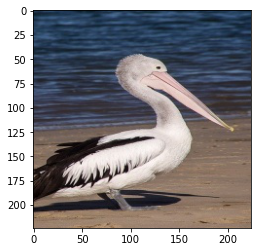

Label (number): 8, (name): PELICAN


In [6]:
#function for displaying a picture
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0].item()
print(img)
imshow(img)
label_str = train_dataset.labels_int_to_str[label]
print(f"Label (number): {label}, (name): {label_str}")

In [7]:
csv_table = pd.read_csv(os.path.join(dataset_dir, "birds.csv"))
l = csv_table["labels"].unique()
l = list(set(l) - set(selected_birds))
for i in l:
    print(i)

GANG GANG COCKATOO
LEARS MACAW
MALABAR HORNBILL
GOLDEN PHEASANT
GUINEAFOWL
VIOLET GREEN SWALLOW
HORNED SUNGEM
AMERICAN COOT
RED HEADED WOODPECKER
BLACK-THROATED SPARROW
WHIMBREL
PAINTED BUNTIG
SPANGLED COTINGA
ROADRUNNER
CAPE MAY WARBLER
YELLOW HEADED BLACKBIRD
JAVA SPARROW
DOUBLE BARRED FINCH
PINK ROBIN
UMBRELLA BIRD
LILAC ROLLER
NORTHERN JACANA
ROYAL FLYCATCHER
BLACK TAIL CRAKE
WHITE CHEEKED TURACO
BLACK SWAN
GILDED FLICKER
YELLOW CACIQUE
INDIAN PITTA
CEDAR WAXWING
NORTHERN MOCKINGBIRD
CROW
COMMON POORWILL
ROSY FACED LOVEBIRD
ALEXANDRINE PARAKEET
PURPLE FINCH
BEARDED BARBET
CROWNED PIGEON
MALEO
WHITE TAILED TROPIC
KIWI
PUFFIN
AMERICAN REDSTART
PHILIPPINE EAGLE
INDIGO BUNTING
COCKATOO
EURASIAN GOLDEN ORIOLE
GREY PLOVER
CHUKAR PARTRIDGE
LONG-EARED OWL
AMERICAN PIPIT
GOULDIAN FINCH
NORTHERN SHOVELER
VICTORIA CROWNED PIGEON
GYRFALCON
BLACK VULTURE
BLACK SKIMMER
TASMANIAN HEN
BALI STARLING
COCK OF THE  ROCK
IMPERIAL SHAQ
RED FACED WARBLER
CALIFORNIA CONDOR
NORTHERN CARDINAL
ENGGANO MYNA
R

In [8]:
import random

l = list(set(l) - set(chosen))
for i in range (0,20):
    print(random.choice(l))

KAKAPO
ELEGANT TROGON
WHITE TAILED TROPIC
NICOBAR PIGEON
MYNA
SAND MARTIN
BARRED PUFFBIRD
UMBRELLA BIRD
CAPUCHINBIRD
INDIGO BUNTING
RAINBOW LORIKEET
BIRD OF PARADISE
HOOPOES
WILSONS BIRD OF PARADISE
GUINEAFOWL
JAVA SPARROW
INDIAN PITTA
ROYAL FLYCATCHER
RAINBOW LORIKEET
CALIFORNIA CONDOR


In [16]:
list = 
["ALBATROSS", 
"BALD EAGLE", 
"BARN OWL", 
"EURASIAN MAGPIE", 
"FLAMINGO",                
"MALLARD DUCK", 
"OSTRICH", 
"PEACOCK", 
"PELICAN", 
"TRUMPTER SWAN",
"MASKED BOOBY",
"EURASIAN GOLDEN ORIOLE",
"MIKADO  PHEASANT",
"HOUSE FINCH",
"ROSY FACED LOVEBIRD",
"EASTERN BLUEBIRD",
"GREY PLOVER",
"INDIAN BUSTARD",
"CUBAN TODY",
"WATTLED CURASSOW",
"BLUE HERON",
"RED WISKERED BULBUL",
"RUBY THROATED HUMMINGBIRD",
"RED HEADED WOODPECKER",
"NORTHERN JACANA",
"GLOSSY IBIS",
"ANHINGA",
"GOLDEN CHLOROPHONIA",
"KING VULTURE",
"TURQUOISE MOTMOT",
"KAKAPO",
"ELEGANT TROGON",
"WHITE TAILED TROPIC",
"NICOBAR PIGEON",
"MYNA",
"SAND MARTIN",
"BARRED PUFFBIRD",
"UMBRELLA BIRD",
"CAPUCHINBIRD",
"INDIGO BUNTING",
"RAINBOW LORIKEET",
"BIRD OF PARADISE",
"HOOPOES",
"WILSONS BIRD OF PARADISE",
"GUINEAFOWL",
"JAVA SPARROW",
"INDIAN PITTA",
"ROYAL FLYCATCHER",
"RAINBOW LORIKEET",
"CALIFORNIA CONDOR"]
print(list)
print(len(list))

['ALBATROSS', 'BALD EAGLE', 'BARN OWL', 'EURASIAN MAGPIE', 'FLAMINGO', 'MALLARD DUCK', 'OSTRICH', 'PEACOCK', 'PELICAN', 'TRUMPTER SWAN', 'MASKED BOOBY', 'EURASIAN GOLDEN ORIOLE', 'MIKADO  PHEASANT', 'HOUSE FINCH', 'ROSY FACED LOVEBIRD', 'EASTERN BLUEBIRD', 'GREY PLOVER', 'INDIAN BUSTARD', 'CUBAN TODY', 'WATTLED CURASSOW', 'BLUE HERON', 'RED WISKERED BULBUL', 'RUBY THROATED HUMMINGBIRD', 'RED HEADED WOODPECKER', 'NORTHERN JACANA', 'GLOSSY IBIS', 'ANHINGA', 'GOLDEN CHLOROPHONIA', 'KING VULTURE', 'TURQUOISE MOTMOT', 'KAKAPO', 'ELEGANT TROGON', 'WHITE TAILED TROPIC', 'NICOBAR PIGEON', 'MYNA', 'SAND MARTIN', 'BARRED PUFFBIRD', 'UMBRELLA BIRD', 'CAPUCHINBIRD', 'INDIGO BUNTING', 'RAINBOW LORIKEET', 'BIRD OF PARADISE', 'HOOPOES', 'WILSONS BIRD OF PARADISE', 'GUINEAFOWL', 'JAVA SPARROW', 'INDIAN PITTA', 'ROYAL FLYCATCHER', 'RAINBOW LORIKEET', 'CALIFORNIA CONDOR']
50
